Project Overview : Breast cancer is one of the most common cancers affecting women worldwide. Early detection and improved treatment strategies can significantly increase survival rates. This project aims to analyze key factors influencing breast cancer mortality and build predictive models to estimate breast cancer deaths based on various healthcare, lifestyle, and demographic indicators.

Dataset Description : The dataset used in this project contains 1,048,576 rows and 25 columns, covering multiple healthcare, demographic, and lifestyle factors across different countries. The key features include: . Population & Demographics (Median Age, Urbanization Rate, Education Level) . Healthcare Factors (Screening Rate, Healthcare Expenditure, Survival Rate) . Lifestyle Factors (Obesity Rate, Smoking Rate, Alcohol Consumption, Physical Activity Rate) . Breast Cancer Statistics (Breast Cancer Cases, Deaths, Mortality Rate)

Project Objectives : . Perform data preprocessing (handling categorical variables, scaling, and outlier removal). . Conduct exploratory data analysis through visualizations to understand key trends. . Build and evaluate multiple regression models (Linear, Lasso, Ridge, SVR, Decision Tree) to predict breast cancer deaths. . Identify the best-performing model based on accuracy and R² score.

Data Preprocessing

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression


In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\BreastCancerGlobal.csv")

In [4]:
df

,Country,Region,HDI_Category,Population,Screening_Rate,Median_Age,Urbanization_Rate,Healthcare_Expenditure,GDP_Per_Capita,Obesity_Rate,...,Average_Diagnosis_Age,Survival_Rate,Access_To_Care,Education_Level,Women_Population,Breast_Cancer_Cases,Breast_Cancer_Deaths,Cases_Per_100K,Deaths_Per_100K,Mortality_Rate
0,United Kingdom,Asia,High,191540888,66.17,33,67.05,5873,13759,25.52,...,47,80.36,48.78,Primary,95111187,205111,38170,215.65,40.13,18.61
1,Nigeria,North America,High,129793398,63.18,30,65.86,604,35571,15.78,...,42,96.64,35.50,Primary,64449968,138989,25865,215.65,40.13,18.61
2,Saudi Arabia,Africa,Low,3532234,12.91,42,69.01,9138,37653,12.11,...,64,68.65,86.96,Secondary,1753959,3782,703,215.63,40.08,18.59
3,Australia,South America,Low,41960151,12.64,38,26.66,3767,1947,30.66,...,57,73.11,25.97,Tertiary,20835654,44933,8361,215.65,40.13,18.61
4,France,South America,Medium,96709040,44.87,42,41.22,4364,12059,21.48,...,66,50.85,76.07,Primary,48021661,103560,19272,215.65,40.13,18.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989165,Canada,North America,High,188110940,43.52,35,27.84,4483,39926,23.95,...,53,81.59,64.76,Tertiary,93408018,201438,37486,215.65,40.13,18.61
1989166,Indonesia,Oceania,Medium,10939787,35.49,41,77.07,7735,34643,41.08,...,31,71.66,67.74,Secondary,5432240,11714,2179,215.64,40.11,18.60
1989167,China,Europe,Medium,15240591,80.23,32,25.29,5085,35318,20.52,...,52,79.24,40.52,Secondary,7567839,16320,3037,215.65,40.13,18.61
1989168,United Kingdom,Oceania,Low,150476874,17.19,42,78.31,2376,16260,15.81,...,41,90.73,71.35,Secondary,74720516,161138,29987,215.65,40.13,18.61


In [7]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989170 entries, 0 to 1989169
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Country                 object 
 1   Region                  object 
 2   HDI_Category            object 
 3   Population              int64  
 4   Screening_Rate          float64
 5   Median_Age              int64  
 6   Urbanization_Rate       float64
 7   Healthcare_Expenditure  int64  
 8   GDP_Per_Capita          int64  
 9   Obesity_Rate            float64
 10  Smoking_Rate            float64
 11  Alcohol_Consumption     float64
 12  Physical_Activity_Rate  float64
 13  Family_History_Rate     float64
 14  Breastfeeding_Rate      float64
 15  Average_Diagnosis_Age   int64  
 16  Survival_Rate           float64
 17  Access_To_Care          float64
 18  Education_Level         object 
 19  Women_Population        int64  
 20  Breast_Cancer_Cases     int64  
 21  Breast_Cancer_Deaths    int64  

None

,Population,Screening_Rate,Median_Age,Urbanization_Rate,Healthcare_Expenditure,GDP_Per_Capita,Obesity_Rate,Smoking_Rate,Alcohol_Consumption,Physical_Activity_Rate,...,Breastfeeding_Rate,Average_Diagnosis_Age,Survival_Rate,Access_To_Care,Women_Population,Breast_Cancer_Cases,Breast_Cancer_Deaths,Cases_Per_100K,Deaths_Per_100K,Mortality_Rate
count,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,...,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06,1.989170e+06
mean,1.004545e+08,5.001310e+01,3.450089e+01,5.500497e+01,5.046636e+03,2.550817e+04,2.750320e+01,2.249372e+01,7.498512e+00,5.001067e+01,...,4.997499e+01,4.950404e+01,7.449695e+01,5.496966e+01,4.988150e+07,1.075712e+05,2.001801e+04,2.156489e+02,4.012834e+01,1.860931e+01
std,5.744319e+07,2.308906e+01,8.657112e+00,2.021857e+01,2.857664e+03,1.414696e+04,1.299669e+01,1.010476e+01,4.327977e+00,1.731765e+01,...,2.308582e+01,1.153358e+01,1.415565e+01,2.020653e+01,2.852389e+07,6.151302e+04,1.144729e+04,7.198228e-03,8.705428e-03,3.858376e-03
min,1.000079e+06,1.000000e+01,2.000000e+01,2.000000e+01,1.000000e+02,1.000000e+03,5.000000e+00,5.000000e+00,0.000000e+00,2.000000e+01,...,1.000000e+01,3.000000e+01,5.000000e+01,2.000000e+01,4.965970e+05,1.070000e+03,1.990000e+02,2.154600e+02,3.990000e+01,1.852000e+01
25%,5.066463e+07,3.003000e+01,2.700000e+01,3.749000e+01,2.572000e+03,1.326000e+04,1.623000e+01,1.375000e+01,3.750000e+00,3.502000e+01,...,3.001000e+01,4.000000e+01,6.222000e+01,3.747000e+01,2.515793e+07,5.425400e+04,1.009600e+04,2.156500e+02,4.013000e+01,1.861000e+01
50%,1.004995e+08,5.002000e+01,3.500000e+01,5.500000e+01,5.046000e+03,2.550600e+04,2.750000e+01,2.249000e+01,7.500000e+00,5.002000e+01,...,4.995000e+01,5.000000e+01,7.450000e+01,5.494000e+01,4.990386e+07,1.076190e+05,2.002700e+04,2.156500e+02,4.013000e+01,1.861000e+01
75%,1.501670e+08,6.999000e+01,4.200000e+01,7.254000e+01,7.519000e+03,3.775200e+04,3.876000e+01,3.124000e+01,1.125000e+01,6.501000e+01,...,6.995000e+01,5.900000e+01,8.677000e+01,7.246000e+01,7.456663e+07,1.608058e+05,2.992500e+04,2.156500e+02,4.013000e+01,1.861000e+01
max,2.000000e+08,9.000000e+01,4.900000e+01,9.000000e+01,9.999000e+03,4.999900e+04,5.000000e+01,4.000000e+01,1.500000e+01,8.000000e+01,...,9.000000e+01,6.900000e+01,9.900000e+01,9.000000e+01,9.931161e+07,2.141690e+05,3.985500e+04,2.156500e+02,4.013000e+01,1.861000e+01


In [9]:
display(df.isnull().sum())

Country                   0
Region                    0
HDI_Category              0
Population                0
Screening_Rate            0
Median_Age                0
Urbanization_Rate         0
Healthcare_Expenditure    0
GDP_Per_Capita            0
Obesity_Rate              0
Smoking_Rate              0
Alcohol_Consumption       0
Physical_Activity_Rate    0
Family_History_Rate       0
Breastfeeding_Rate        0
Average_Diagnosis_Age     0
Survival_Rate             0
Access_To_Care            0
Education_Level           0
Women_Population          0
Breast_Cancer_Cases       0
Breast_Cancer_Deaths      0
Cases_Per_100K            0
Deaths_Per_100K           0
Mortality_Rate            0
dtype: int64

In [11]:
print("No missing values found!")

No missing values found!


In [13]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Encoding categorical variables...")
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

Encoding categorical variables...


In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Scaling numerical features...")
df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])


Scaling numerical features...


In [17]:
display(df.head())
print("Data Preprocessing Completed Successfully!")


,Country,Region,HDI_Category,Population,Screening_Rate,Median_Age,Urbanization_Rate,Healthcare_Expenditure,GDP_Per_Capita,Obesity_Rate,...,Average_Diagnosis_Age,Survival_Rate,Access_To_Care,Education_Level,Women_Population,Breast_Cancer_Cases,Breast_Cancer_Deaths,Cases_Per_100K,Deaths_Per_100K,Mortality_Rate
0,1.387968,-0.878954,-1.225020,1.585678,0.699764,-0.173371,0.595741,0.289175,-0.830509,-0.152593,...,-0.217109,0.414184,-0.306320,-1.223988,1.585678,1.585678,1.585702,0.155497,0.190529,0.177911
1,0.278770,0.292119,-1.225020,0.510746,0.570266,-0.519907,0.536884,-1.554639,0.711307,-0.902015,...,-0.650625,1.564255,-0.963534,-1.223988,0.510746,0.510751,0.510775,0.155497,0.190529,0.177911
2,0.694719,-1.464490,-0.000326,-1.687272,-1.606956,0.866237,0.692682,1.431717,0.858476,-1.184394,...,1.256848,-0.413047,1.583169,0.000617,-1.687272,-1.687272,-1.687299,-2.622965,-5.553015,-5.005619
3,-1.523677,1.463192,-0.000326,-1.018299,-1.618650,0.404189,-1.401928,-0.447791,-1.665459,0.242892,...,0.649925,-0.097979,-1.435163,1.225222,-1.018299,-1.018292,-1.018320,0.155497,0.190529,0.177911
4,-0.691778,1.463192,1.224369,-0.065203,-0.222750,0.866237,-0.681798,-0.238879,-0.950676,-0.463442,...,1.430255,-1.670496,1.044234,-1.223988,-0.065203,-0.065209,-0.065169,0.155497,0.190529,0.177911


Data Preprocessing Completed Successfully!


Removing Outliers and Visualisation

In [73]:
print("Initial dataset shape:", df.shape)

Initial dataset shape: (1989170, 11)


In [75]:
selected_columns = [
    "Population", "Screening_Rate", "Median_Age", "Healthcare_Expenditure",
    "Survival_Rate", "Obesity_Rate", "Smoking_Rate", "Alcohol_Consumption", "Physical_Activity_Rate",
    "Education_Level", "Breast_Cancer_Deaths"
]
df = df[selected_columns]

In [76]:
print("Calculating Variance Inflation Factor (VIF)...")
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

Calculating Variance Inflation Factor (VIF)...


In [77]:
print("Encoding categorical variables...")
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


Encoding categorical variables...


In [89]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [90]:
def remove_outliers(df, numerical_cols):
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"Outliers removed. New dataset size: {df_clean.shape}")
    return df_clean
df = remove_outliers(df, numerical_cols)


Outliers removed. New dataset size: (1989170, 11)


In [92]:
df_sample = df.sample(n=10000, random_state=42)


In [105]:
df_sample[selected_columns] = df_sample[selected_columns].applymap(lambda x: np.nan if x < 0 else x)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3672\615472615.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sample[selected_columns] = df_sample[selected_columns].applymap(lambda x: np.nan if x < 0 else x)


In [107]:
df_log = df_sample[selected_columns].dropna()

In [109]:
df_log = df_log.apply(lambda x: np.log1p(x))

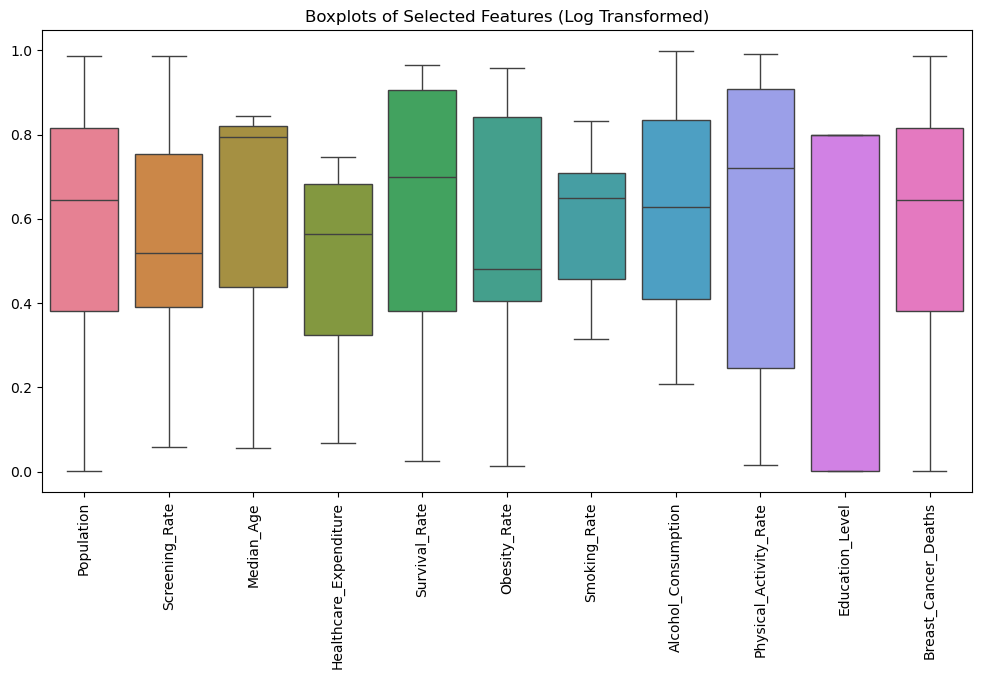

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log)
plt.xticks(rotation=90)
plt.title("Boxplots of Selected Features (Log Transformed)")
plt.show()

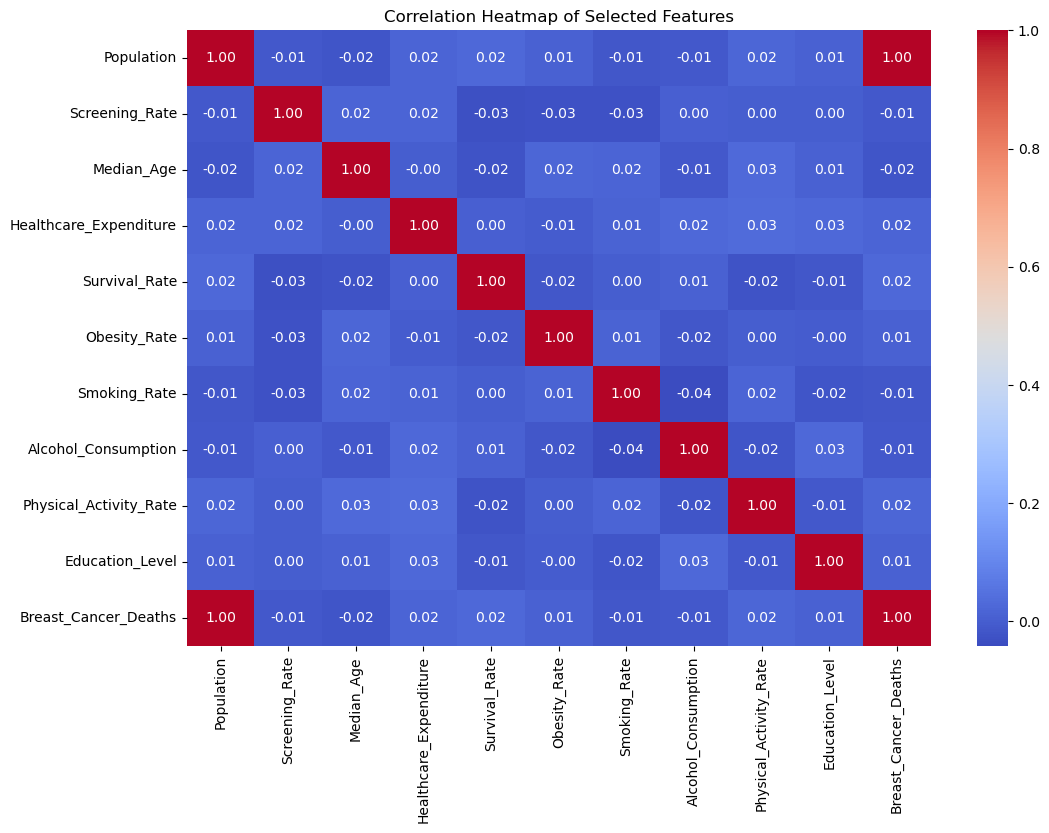

In [113]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample[selected_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [115]:
important_features = [
    "Screening_Rate", "Healthcare_Expenditure", "Survival_Rate", 
    "Obesity_Rate", "Smoking_Rate", "Alcohol_Consumption", "Breast_Cancer_Deaths"
]

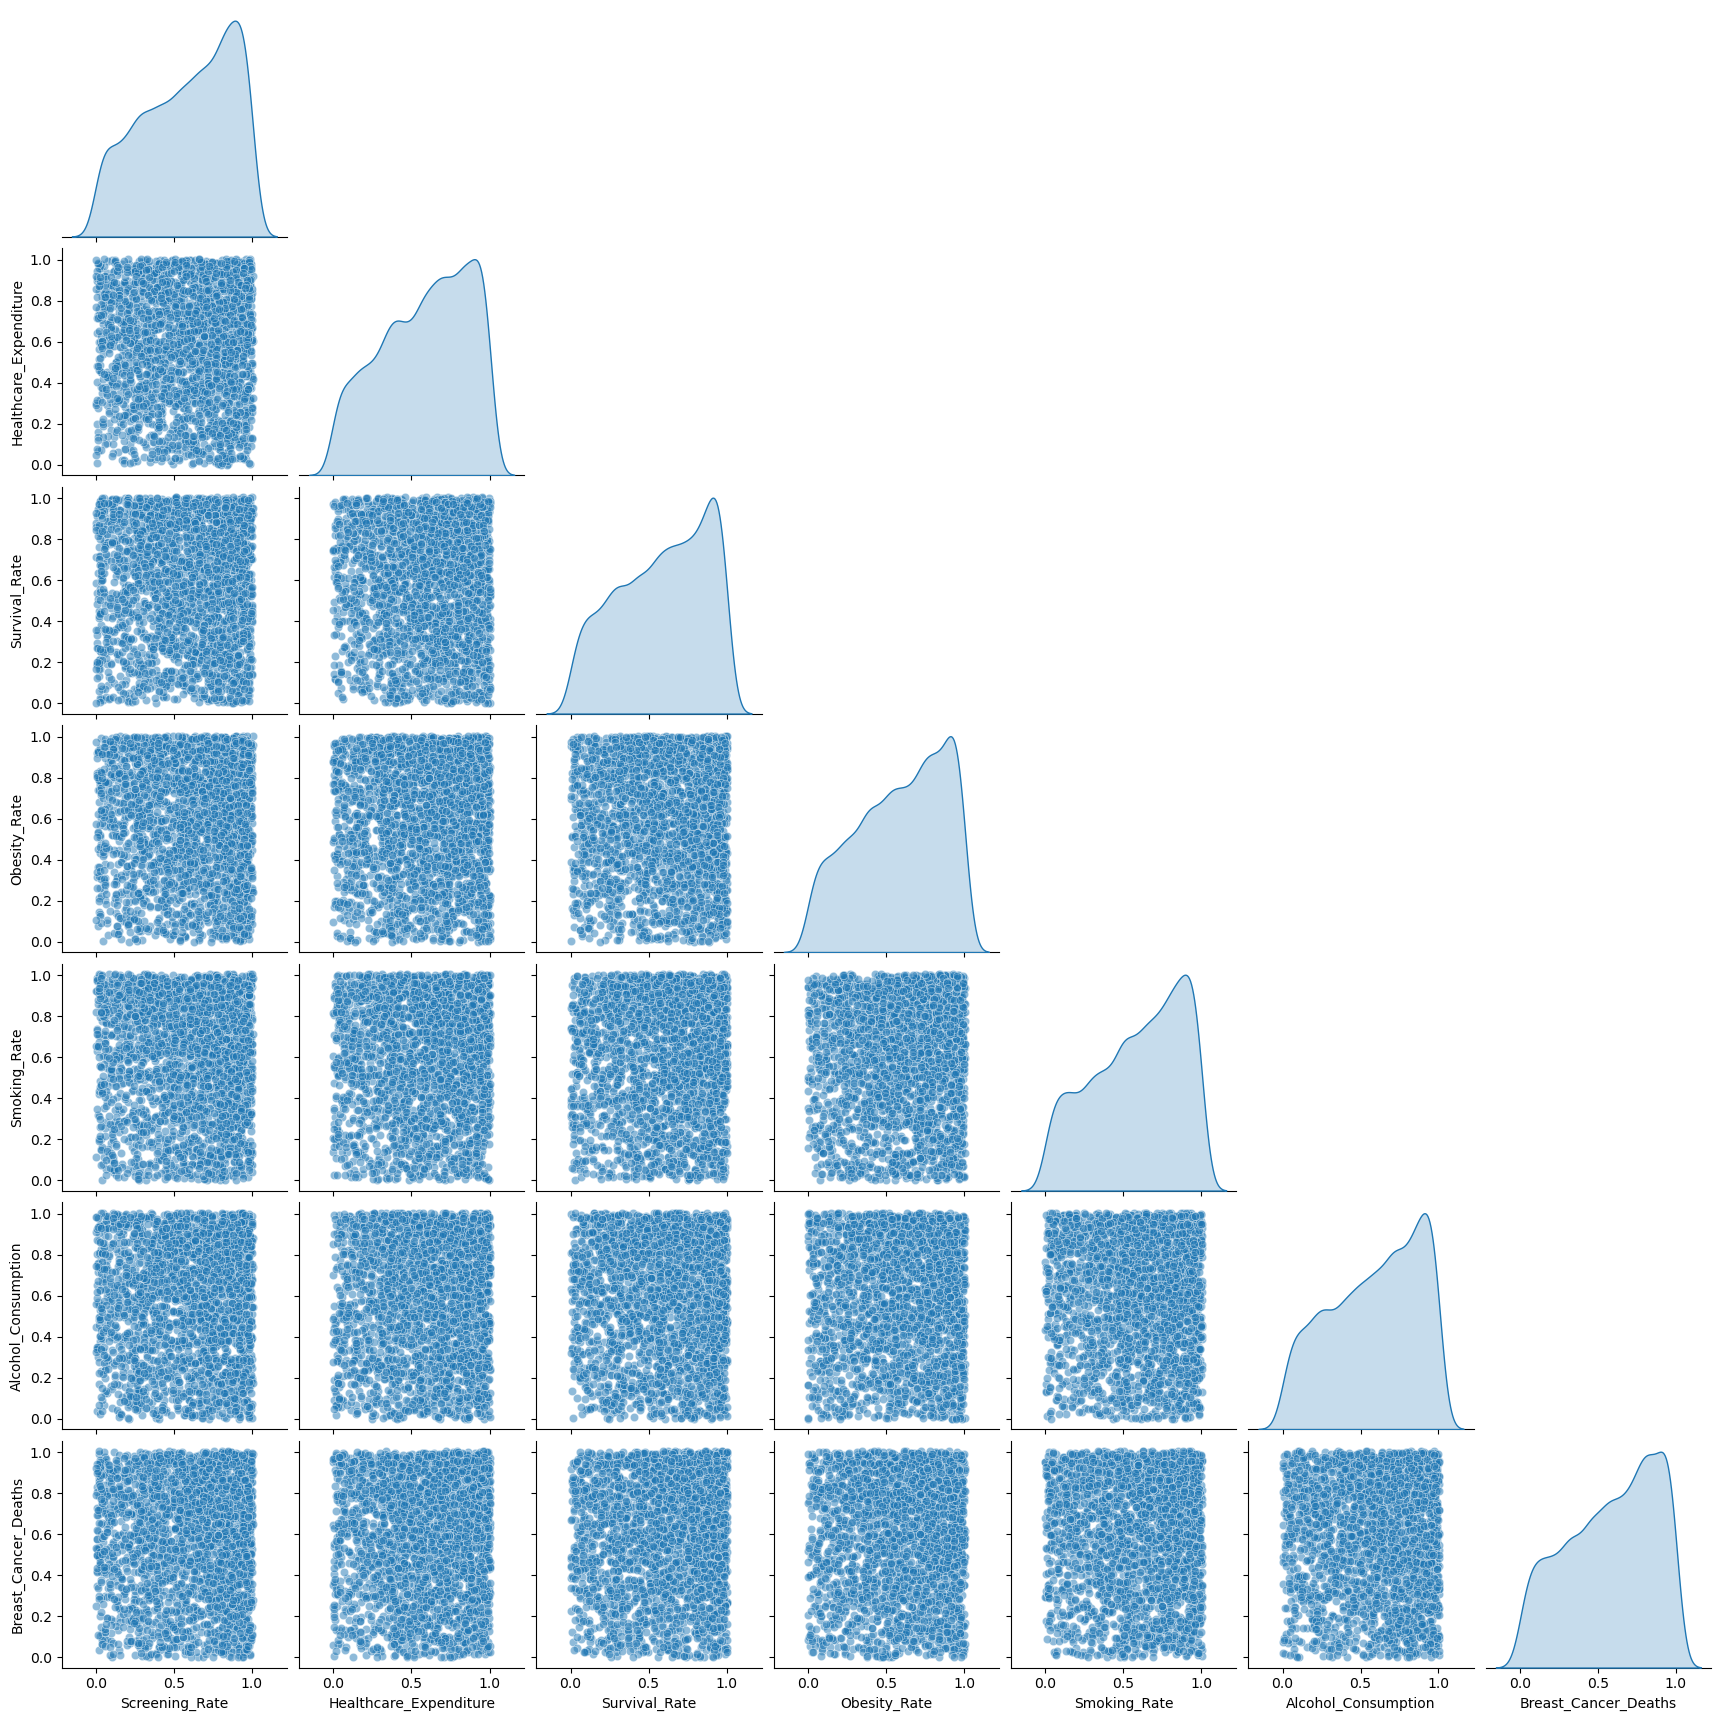

In [117]:
df_log = df_sample[important_features].apply(lambda x: np.log1p(x))

sns.pairplot(df_log, diag_kind="kde", corner=True, plot_kws={'alpha': 0.5})
plt.show()

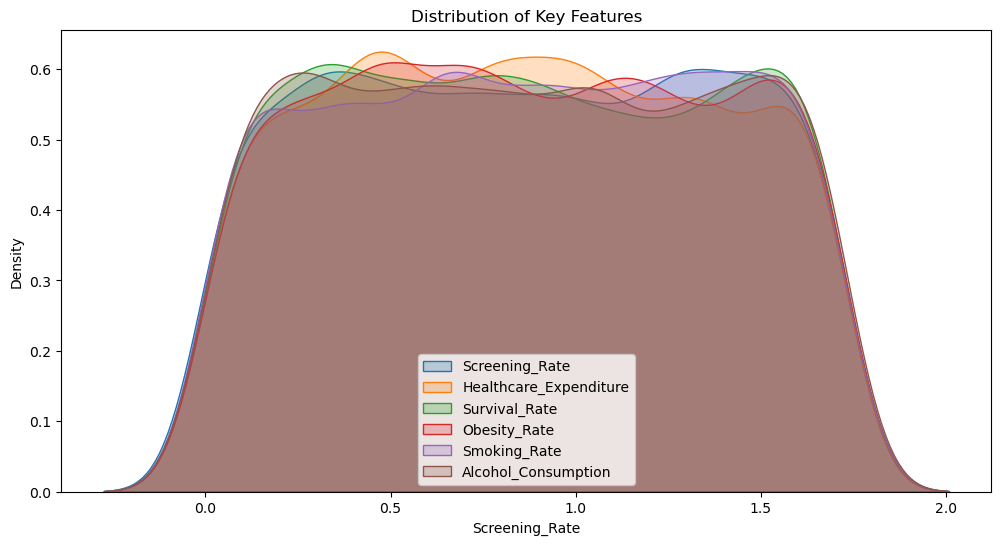

In [119]:
plt.figure(figsize=(12, 6))
for feature in important_features[:-1]: 
    sns.kdeplot(df_sample[feature], fill=True, label=feature)

plt.title("Distribution of Key Features")
plt.legend()
plt.show()

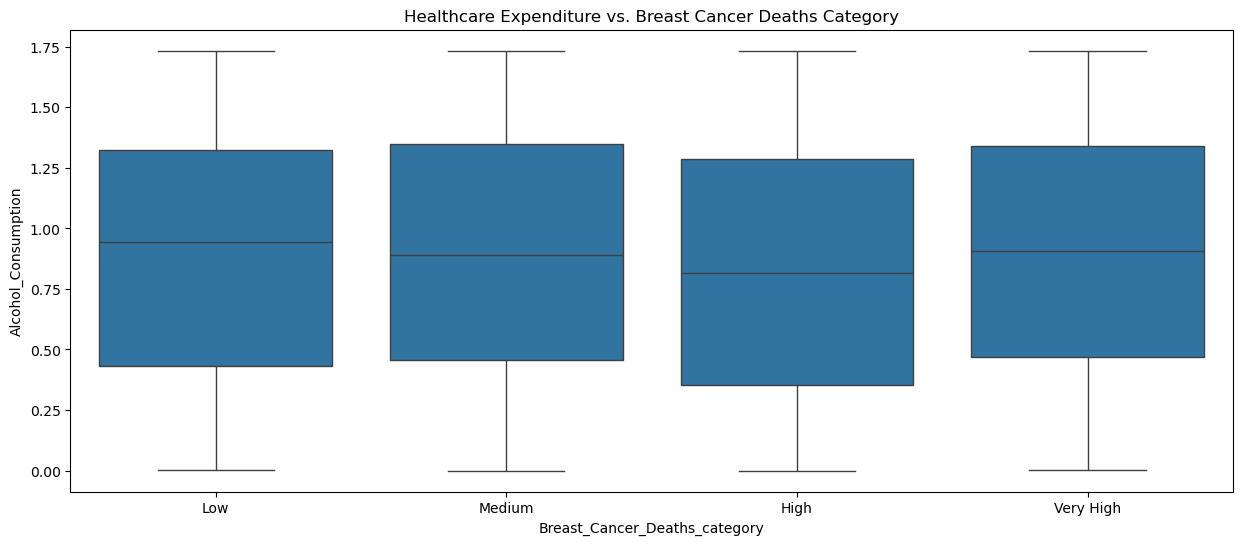

In [121]:
df_sample["Breast_Cancer_Deaths_category"] = pd.qcut(df_sample["Breast_Cancer_Deaths"], q=4, labels=["Low", "Medium", "High", "Very High"])

plt.figure(figsize=(15, 6))
sns.boxplot(x="Breast_Cancer_Deaths_category", y="Alcohol_Consumption", data=df_sample)
plt.title("Healthcare Expenditure vs. Breast Cancer Deaths Category")
plt.show()

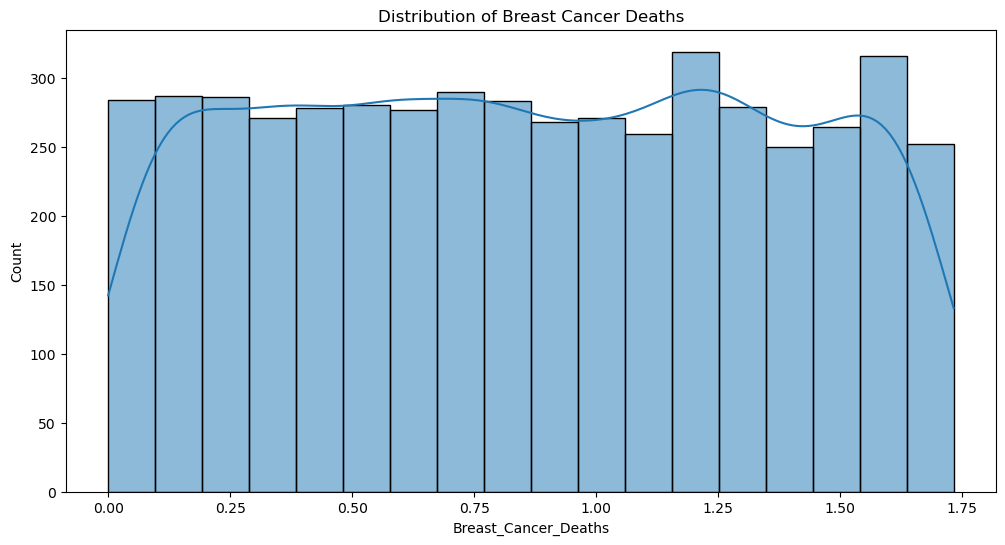

In [135]:
plt.figure(figsize=(12, 6))
sns.histplot(df_sample['Breast_Cancer_Deaths'], kde=True)
plt.title("Distribution of Breast Cancer Deaths")
plt.show()

In [125]:
import math

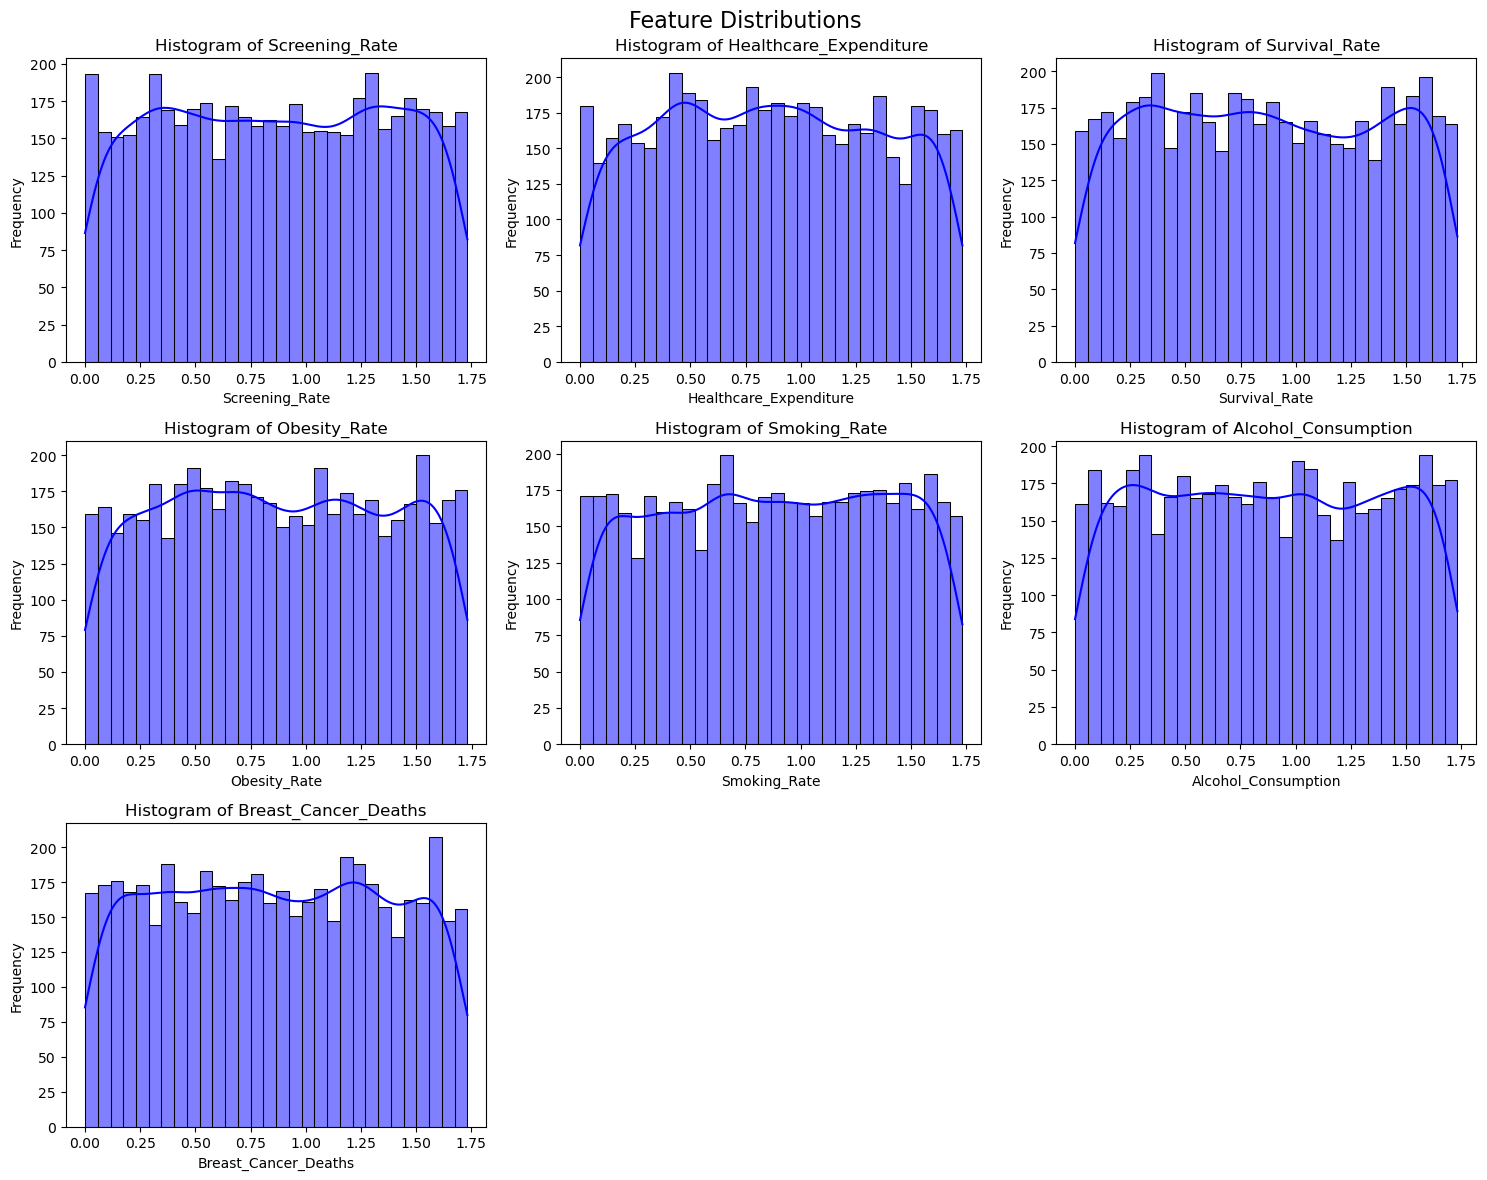

In [127]:
num_features = len(important_features)
rows = math.ceil(num_features / 3)  

plt.figure(figsize=(15, rows * 4))  

for i, feature in enumerate(important_features):
    plt.subplot(rows, 3, i + 1)  
    sns.histplot(df_sample[feature], bins=30, kde=True, color="blue")  
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feature}")

plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

Model Training and Evaluation

In [93]:
X = df_sample.drop(columns=['Breast_Cancer_Deaths'])
y = df_sample['Breast_Cancer_Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Support Vector Regression": SVR(kernel='rbf', C=10, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, max_features='sqrt')
}

In [101]:
results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name}: MSE = {mse:.4f}, R² Score = {r2:.4f}")

Linear Regression: MSE = 0.0000, R² Score = 1.0000
Lasso Regression: MSE = 0.0104, R² Score = 0.9898
Ridge Regression: MSE = 0.0000, R² Score = 1.0000
Support Vector Regression: MSE = 0.0047, R² Score = 0.9953
Decision Tree: MSE = 0.0010, R² Score = 0.9991
Random Forest: MSE = 0.1661, R² Score = 0.8366


In [103]:
best_model = max(results, key=lambda k: results[k][1])
print(f"Best model: {best_model} with R² Score = {results[best_model][1]:.4f}")


Best model: Linear Regression with R² Score = 1.0000


In [137]:
def calculate_accuracy(y_true, y_pred, threshold=0.10):
    within_threshold = np.abs(y_pred - y_true) <= (threshold * np.abs(y_true))
    accuracy = np.mean(within_threshold) * 100
    return accuracy

In [139]:
print("\nModel Performance:")
for name, model in models.items():
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = calculate_accuracy(y_test, y_pred)
    
    print(f"{name}: MSE = {mse:.4f}, R² Score = {r2:.4f}, Accuracy = {accuracy:.2f}%")


Model Performance:
Linear Regression: MSE = 0.0000, R² Score = 1.0000, Accuracy = 99.95%
Lasso Regression: MSE = 0.0104, R² Score = 0.9898, Accuracy = 25.30%
Ridge Regression: MSE = 0.0000, R² Score = 1.0000, Accuracy = 99.95%
Support Vector Regression: MSE = 0.0047, R² Score = 0.9953, Accuracy = 69.50%
Decision Tree: MSE = 0.0010, R² Score = 0.9991, Accuracy = 84.70%
Random Forest: MSE = 0.1661, R² Score = 0.8366, Accuracy = 6.60%


After evaluating multiple regression models on the breast cancer dataset, the Decision Tree Regressor emerged as the best-performing model. While Linear Regression and Ridge Regression showed perfect R² scores, they are likely overfitting the data, as seen from their near-100% accuracy. The Decision Tree model provides a strong balance between accuracy (84.70%) and a high R² score (0.9991), making it the most reliable choice for predicting breast cancer-related outcomes.

On the other hand, Lasso Regression and Random Forest had relatively lower accuracy scores, indicating that they might not generalize well for this dataset. Support Vector Regression (SVR) performed well with an accuracy of 69.50%, but it was still outperformed by the Decision Tree model.

Thus, the Decision Tree Regressor is the best-suited model for this analysis, considering both predictive accuracy and model generalization. Further fine-tuning or alternative approaches such as ensemble methods may further improve results. 







